# EECS 731 Final Project - Clothing One
## Clustering

In [1]:
import pandas as pd
import pickle

In [2]:
reviews = pickle.load(open("../Data/reviews.pkl", "rb" ))
rented_for_encoding = pickle.load(open("../Data/rented_for_encoding.pkl", "rb"))
body_type_encoding = pickle.load(open("../Data/body_type_encoding.pkl", "rb"))
category_encoding = pickle.load(open("../Data/category_encoding.pkl", "rb"))

In [3]:
reviews.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff
0,28,3,44,fit,68.0,2260466,10,6,2016-04-20,14,420272,137,590,4
1,36,6,20,fit,66.0,153475,10,3,2013-06-18,12,273551,132,390,2
2,34,4,16,fit,65.0,126335,8,2,2014-02-12,8,909926,135,480,3
3,27,1,20,fit,69.0,616682,10,7,2016-09-26,12,151944,145,390,2
4,45,1,16,fit,68.0,364092,8,0,2016-04-30,8,734848,138,310,2


In [4]:
rented_for_encoding.head()

,encoding
labels,
date,0
everyday,1
formal affair,2
other,3
party,4


In [5]:
body_type_encoding.head()

,encoding
labels,
apple,0
athletic,1
full bust,2
hourglass,3
pear,4


In [6]:
category_encoding.head()

,encoding
labels,
ballgown,0
blazer,1
blouse,2
blouson,3
bomber,4


In [7]:
userDetails = reviews[['age', 'body_type','height','weight', 'user_id', 'bust_volume', 'chest_diff']].copy()
#add weight to the body_type by creating another column and cubing it - CONSIDER REMOVING THIS

print('userDetails Length: ' + str(len(userDetails)))
userDetails.head()

userDetails Length: 146381


,age,body_type,height,weight,user_id,bust_volume,chest_diff
0,28,3,68.0,137,420272,590,4
1,36,6,66.0,132,273551,390,2
2,34,4,65.0,135,909926,480,3
3,27,1,69.0,145,151944,390,2
4,45,1,68.0,138,734848,310,2


In [8]:
#One-hot encode body_type for KMEANS

b = body_type_encoding.copy()
b.reset_index(inplace=True)

dictBody_type = b.to_dict()
for i, row in b.iterrows():
    userDetails[row['labels']] = 0
    
for index, row in userDetails.iterrows():
    userDetails.at[index, dictBody_type['labels'][row['body_type']]] = 1
    
userDetails.drop(columns=['body_type'],inplace = True)
userDetails.head()


,age,height,weight,user_id,bust_volume,chest_diff,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
0,28,68.0,137,420272,590,4,0,0,0,1,0,0,0
1,36,66.0,132,273551,390,2,0,0,0,0,0,0,1
2,34,65.0,135,909926,480,3,0,0,0,0,1,0,0
3,27,69.0,145,151944,390,2,0,1,0,0,0,0,0
4,45,68.0,138,734848,310,2,0,1,0,0,0,0,0


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#drop duplicates of user info (if the same user submitted multiple reviews), then drop user_id
userDetailsNoDuplicates = userDetails.drop_duplicates(keep = 'first').copy()
print('userDetailsNoDuplicates Length: ' + str(len(userDetailsNoDuplicates)))
userIdsNoDups = userDetailsNoDuplicates['user_id'].copy()
userDetailsNoDuplicates.reset_index(inplace=True)
userDetailsNoDuplicates.drop(columns=['user_id', 'index'], inplace=True)
#print(userDetailsNoDuplicates.head())
#userDetailsNoDuplicates = pd.DataFrame(scaler.fit_transform(userDetailsNoDuplicates))

#userDetailsNoDuplicates.columns=['age', 'height', 'weight', 'bust_volume', 'chest_diff', 'apple', 'athletic', 'full bust', 'hourglass', 'pear', 'petite', 'straight & narrow']
userDetailsNoDuplicates.head()

userDetailsNoDuplicates Length: 77347


,age,height,weight,bust_volume,chest_diff,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
0,28,68.0,137,590,4,0,0,0,1,0,0,0
1,36,66.0,132,390,2,0,0,0,0,0,0,1
2,34,65.0,135,480,3,0,0,0,0,1,0,0
3,27,69.0,145,390,2,0,1,0,0,0,0,0
4,45,68.0,138,310,2,0,1,0,0,0,0,0


## Model 1 - KMEANS

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {}
mapping2 = {} 
K = range(1,15, 1) 

#userDetailsNoDuplicates = userDetailsNoDuplicates[['height', 'weight', 'bust_volume', 'chest_diff', 'age']]

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, n_init=15, n_jobs=-1, max_iter=1000, algorithm='full').fit(userDetailsNoDuplicates)
      
    distortions.append(sum(np.min(cdist(userDetailsNoDuplicates, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / userDetailsNoDuplicates.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(userDetailsNoDuplicates, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / userDetailsNoDuplicates.shape[0] 
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Elbow')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
#predict for our data set
numClusters = 7
print(userDetailsNoDuplicates.head())
kmeans =  KMeans(n_clusters=numClusters, random_state=0).fit(userDetailsNoDuplicates)
kmeansResults = kmeans.predict(userDetailsNoDuplicates)
print(kmeansResults)

   age  height  weight  bust_volume  chest_diff  apple  athletic  full bust  \
0   28    68.0     137          590           4      0         0          0   
1   36    66.0     132          390           2      0         0          0   
2   34    65.0     135          480           3      0         0          0   
3   27    69.0     145          390           2      0         1          0   
4   45    68.0     138          310           2      0         1          0   

   hourglass  pear  petite  straight & narrow  
0          1     0       0                  0  
1          0     0       0                  1  
2          0     1       0                  0  
3          0     0       0                  0  
4          0     0       0                  0  
[0 4 2 ... 0 0 2]


In [12]:
userDetailsNoDupsResults =userDetailsNoDuplicates.copy()
userDetailsNoDupsResults['kmeans_cluster'] = pd.DataFrame(kmeansResults)
userDetailsNoDupsResults.head()

,age,height,weight,bust_volume,chest_diff,apple,athletic,full bust,hourglass,pear,petite,straight & narrow,kmeans_cluster
0,28,68.0,137,590,4,0,0,0,1,0,0,0,0
1,36,66.0,132,390,2,0,0,0,0,0,0,1,4
2,34,65.0,135,480,3,0,0,0,0,1,0,0,2
3,27,69.0,145,390,2,0,1,0,0,0,0,0,4
4,45,68.0,138,310,2,0,1,0,0,0,0,0,1


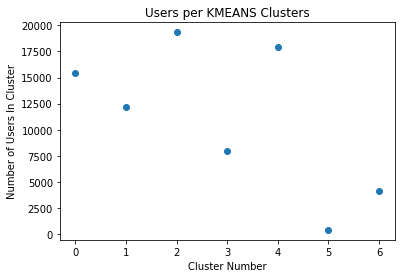

In [13]:
#visualize the clusters
dict = {}

for i, row in userDetailsNoDupsResults.iterrows():    
    dict[row['kmeans_cluster']] = dict.get(row['kmeans_cluster'], 0) + 1
    
z = pd.DataFrame(list(dict.items())).iloc[0:numClusters]
x = z[0]
y = z[1]

plt.scatter(x, y)
plt.xlabel('Cluster Number')
plt.ylabel('Number of Users In Cluster')
plt.title('Users per KMEANS Clusters')
plt.show()

In [14]:
userDetails['kmeans_cluster'] = kmeans.predict(userDetails.drop(columns=['user_id']))
reviews['kmeans_cluster'] = userDetails['kmeans_cluster'].copy()
reviews.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,kmeans_cluster
0,28,3,44,fit,68.0,2260466,10,6,2016-04-20,14,420272,137,590,4,0
1,36,6,20,fit,66.0,153475,10,3,2013-06-18,12,273551,132,390,2,4
2,34,4,16,fit,65.0,126335,8,2,2014-02-12,8,909926,135,480,3,2
3,27,1,20,fit,69.0,616682,10,7,2016-09-26,12,151944,145,390,2,4
4,45,1,16,fit,68.0,364092,8,0,2016-04-30,8,734848,138,310,2,1


## Model 2 - Mean Shift

In [15]:
userDetailsNoDuplicates.head()

,age,height,weight,bust_volume,chest_diff,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
0,28,68.0,137,590,4,0,0,0,1,0,0,0
1,36,66.0,132,390,2,0,0,0,0,0,0,1
2,34,65.0,135,480,3,0,0,0,0,1,0,0
3,27,69.0,145,390,2,0,1,0,0,0,0,0
4,45,68.0,138,310,2,0,1,0,0,0,0,0


In [16]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=4 ,n_jobs=-1, bin_seeding=True, min_bin_freq=10).fit(userDetailsNoDuplicates)
#bandwith was a bottleneck here (specifically estimate_bandwith function ) https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html



Chose these two models for technical reasons {1} and {2} and also because we wanted a static predict function, which many others didn't have. This is used to find a cluster that a specific use is in, rather than creating clusters with all users repeatedly

In [17]:
res = clustering.predict(userDetails.drop(columns=['kmeans_cluster', 'user_id']))
userDetails['mean_shift_cluster'] = res

reviews['mean_shift_cluster'] = userDetails['mean_shift_cluster']
print(reviews.head())
resNoDups = pd.DataFrame(clustering.predict(userDetailsNoDuplicates))
resNoDups.columns=['mean_shift_cluster']
resNoDups.head()


   age  body_type  category  fit  height  item_id  rating  rented_for  \
0   28          3        44  fit    68.0  2260466      10           6   
1   36          6        20  fit    66.0   153475      10           3   
2   34          4        16  fit    65.0   126335       8           2   
3   27          1        20  fit    69.0   616682      10           7   
4   45          1        16  fit    68.0   364092       8           0   

  review_date  size  user_id  weight  bust_volume  chest_diff  kmeans_cluster  \
0  2016-04-20    14   420272     137          590           4               0   
1  2013-06-18    12   273551     132          390           2               4   
2  2014-02-12     8   909926     135          480           3               2   
3  2016-09-26    12   151944     145          390           2               4   
4  2016-04-30     8   734848     138          310           2               1   

   mean_shift_cluster  
0                  16  
1                   1  
2 

,mean_shift_cluster
0,16
1,1
2,3
3,26
4,132


Number of Clusters: 165


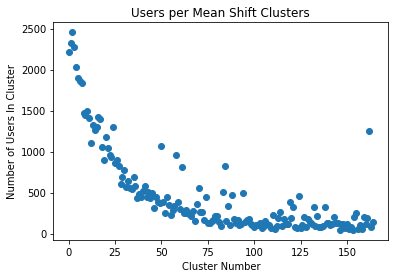

In [18]:
# scatter plot of the clusters for mean shift
print("Number of Clusters: " + str(resNoDups['mean_shift_cluster'].nunique()))
#visualize the clusters
dict = {}

for i, row in resNoDups.iterrows():    
    dict[row['mean_shift_cluster']] = dict.get(row['mean_shift_cluster'], 0) + 1
    
z = pd.DataFrame(list(dict.items())).iloc[0:resNoDups['mean_shift_cluster'].nunique()]
x = z[0]
y = z[1]


plt.scatter(x, y) 
plt.xlabel('Cluster Number') 
plt.ylabel('Number of Users In Cluster') 
plt.title('Users per Mean Shift Clusters') 
plt.show() 

## Post-Model Refinement

* User submits data, then they are assigned to a cluster
* Filter by occassion
* Consider most common items for a specific occasion
* Generate score combining date (recent better), rating, and percentage of users who said item fit

In [29]:
reviewsToFilter = reviews.copy()
reviewsToFilter.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,kmeans_cluster,mean_shift_cluster
0,28,3,44,fit,68.0,2260466,10,6,2016-04-20,14,420272,137,590,4,0,16
1,36,6,20,fit,66.0,153475,10,3,2013-06-18,12,273551,132,390,2,4,1
2,34,4,16,fit,65.0,126335,8,2,2014-02-12,8,909926,135,480,3,2,3
3,27,1,20,fit,69.0,616682,10,7,2016-09-26,12,151944,145,390,2,4,26
4,45,1,16,fit,68.0,364092,8,0,2016-04-30,8,734848,138,310,2,1,132


In [30]:
#this corresponds to rented_for
userOccasion = 6
#assign a user to a body cluster (they would use the model to be fitted)
userBodyCluster = 1

reviewsByOccasion = reviewsToFilter[reviewsToFilter['rented_for'] == userOccasion]
reviewsByOccasion = reviewsByOccasion[reviewsByOccasion['mean_shift_cluster'] == userBodyCluster]
reviewsByOccasion.reset_index(drop=True, inplace=True)
print('Number of occasion instances: ' + str(len(reviewsByOccasion)))
reviewsByOccasion.head()

Number of occasion instances: 79


,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,kmeans_cluster,mean_shift_cluster
0,28,1,15,large,65.0,2885734,8,6,2016-05-10,4,619684,130,390,2,4,1
1,26,4,44,fit,67.0,2378271,10,6,2017-05-30,14,45337,130,390,2,4,1
2,32,1,16,fit,70.0,232899,10,6,2016-04-01,14,486373,130,390,2,4,1
3,26,3,16,fit,69.0,1750560,10,6,2017-04-20,4,657953,130,390,3,4,1
4,35,6,16,fit,68.0,143094,8,6,2014-03-26,8,909409,130,390,2,4,1


In [31]:
# generate most common item categories for occasion
catCounts = reviewsByOccasion['category'].value_counts().to_frame()
catCounts.columns=['count']
catCounts.head()


#
itemCounts = reviews['item_id'].value_counts().to_frame()
itemCounts.columns=['count']
print(len(itemCounts))
itemCounts[itemCounts['count'] > 100]

5736


,count
126335,1527
123793,1354
174086,1273
127865,1116
145906,1111
132738,1090
137585,884
136110,850
172027,831
131533,784


In [32]:
#Generate a score combining date (recent better), rating, and percentage of users who said item fit

# date score = 10 * 1 / fourth root(days since review_date) # Max score is 10, start with most recent date in set
# rating score = 1 * rating
# fit score = 10 * percentage of users who said item fit

mostRecentDate = reviewsByOccasion['review_date'].max()

#fit score
reviewsPerItem = reviewsByOccasion['item_id'].value_counts().to_frame()
reviewsPerItem.columns=['count']
reviewsPerItem['fit_count'] = 0
reviewsPerItem.head()

for index, row in reviewsByOccasion.iterrows():
    if (row['fit'] == 'fit'):
        reviewsPerItem.at[row['item_id'], 'fit_count'] = reviewsPerItem.at[row['item_id'], 'fit_count'] + 1

reviewsPerItem['ratio'] = reviewsPerItem['fit_count'] / reviewsPerItem['count']
reviewsPerItem.head()

,count,fit_count,ratio
2098200,2,2,1.0
1580030,2,2,1.0
2160087,2,1,0.5
963476,2,1,0.5
143094,2,1,0.5


In [33]:
def cube_root(num):
    return num ** (1. / 3)

reviewsByOccasion['fit_score'] = 0
fitDict = reviewsPerItem.drop(columns=['count', 'fit_count']).to_dict()

for index, row in reviewsByOccasion.iterrows():
    reviewsByOccasion.loc[index, 'fit_score'] = fitDict['ratio'][int(row['item_id'])] * 10

reviewsByOccasion['priority_score'] = (20 / cube_root((mostRecentDate - reviewsByOccasion['review_date']).dt.days)) + reviewsByOccasion['rating'] + reviewsByOccasion['fit_score']
reviewsByOccasion.drop(columns=['fit_score'], inplace = True)

reviewsByOccasion.head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,chest_diff,kmeans_cluster,mean_shift_cluster,priority_score
0,28,1,15,large,65.0,2885734,8,6,2016-05-10,4,619684,130,390,2,4,1,10.367323
1,26,4,44,fit,67.0,2378271,10,6,2017-05-30,14,45337,130,390,2,4,1,23.323108
2,32,1,16,fit,70.0,232899,10,6,2016-04-01,14,486373,130,390,2,4,1,22.318382
3,26,3,16,fit,69.0,1750560,10,6,2017-04-20,4,657953,130,390,3,4,1,23.141642
4,35,6,16,fit,68.0,143094,8,6,2014-03-26,8,909409,130,390,2,4,1,14.796837


In [34]:
#sort items by priority score
recItems = reviewsByOccasion[['category', 'item_id', 'priority_score']].copy()
recItems = recItems[recItems['priority_score'] < 1000]
recItems.sort_values(by='priority_score', inplace = True, ascending= False)
recItems.head()

,category,item_id,priority_score
62,16,323450,25.358323
59,44,2058499,25.227580
28,45,298336,24.430309
61,16,452942,24.337984
70,16,1552178,23.842586


In [35]:
#Get top three items from top three categories

print("Top Categories")
print(catCounts.head())
#select the top three categories
cat16 = recItems[recItems['category'] == 16]
cat45 = recItems[recItems['category'] == 45]
cat44 = recItems[recItems['category'] == 44]


Top Categories
    count
16     35
44     12
45      8
32      7
26      6


In [36]:
cat16.head()

,category,item_id,priority_score
62,16,323450,25.358323
61,16,452942,24.337984
70,16,1552178,23.842586
13,16,1526552,23.548779
34,16,780217,23.397452


In [37]:
cat45.head()

,category,item_id,priority_score
28,45,298336,24.430309
39,45,1726201,23.196254
50,45,1621234,22.251424
27,45,1397005,21.102071
29,45,1918815,14.430309


In [38]:
cat44.head()

,category,item_id,priority_score
59,44,2058499,25.227580
19,44,2378271,23.414271
1,44,2378271,23.323108
42,44,2098200,22.587117
78,44,2771463,22.583394
